# Зачетная работа
Гончарова Анна, группа 382008-1, вариант 4

# Численное интегрирование. Светимость черного тела


# Теория
Согласно формуле Планка спектральная плотность энергетической светимости абсолютно чёрного тела равна$$
\varphi(\lambda, T) =\frac{2 \pi h c^2}{\lambda^5 \left(e^{\frac{h c}{\lambda k T}} - 1\right)},
$$где $h = 6.6261 \times 10^{-34}$ (постоянная Планка, $\mbox{Вт}\cdot\mbox{с}^2$); $k = 1.3806 \times 10^{-23}$ (постоянная Больцмана, Вт с/K); $c = 2.9979 \times 10^{8}$ (скорость света, м/с); $T = 5778$ (эффективная температура Солнца, К). Формула Планка позволяет узнать, какую энергию излучает единица поверхности тела с эффективной температурой $T$ за единицу времени на каждой единице длины волны $\lambda$. Для определения энергии, излучаемой телом в определенном диапазоне частот $\lambda_1$, $\lambda_2$, необходио найти интеграл$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$Применим эти знания к Солнцу. Нас не должно удивлять, что формулу для абсолютно черного тела мы применяем к Солцну. Среди тел нашей системы Солнце всех лучше удовлетворяет свойствам абсолютно черного тела.

Чтобы узнать полную энергетическую светимость Солнца надо умножить $R(\lambda_1,\lambda_2,T)$ на площадь поверхности Солнца. Пригодится его радиус: $R = 6.957\times 10^8$ (м)

# Задачи
1.Постройте для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$.

2.С помощью численного интегрирования найдите светимость Солнца на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от $\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

3.Найдите также светимость Солнца для всех длин волн: от $0$ до $\infty$ (вам придется брать несобственный интеграл).

4.Этот интеграл, оказывается, можно взять аналитически и энергетическая светимость равна $R^* = \sigma T^4$, где$$
\sigma = \frac{8\pi^5 k^4}{15 c^3 h^3}
$$Это так называемый закон Стефана–Больцмана. Константа $\sigma$ называется константой Стефана–Больцмана. Чтобы узнать полную энергетическую светимость не забудьте $R^*$ умножить на площадь поверхности Солнца. Сравните полученный результат с результатом из предыдущего пункта.

5.Найдите так называемую солнечную постоянную – мощность солнечного излучения, падающего перпендикулярно на единичную площадку на высоте верхней границы атмосферы Земли. Вам пригодится расстояние от Солна до Земли: $149.6\times 10^9$ м

6.Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными.

7.Сделайте выводы.

# 1. Постройте для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$.

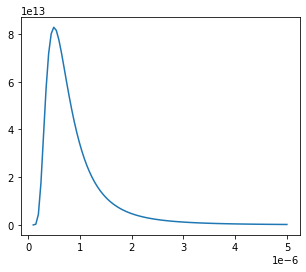

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
plt.figure(figsize = (5,4))
T = 5778
c = 2.9979*10**8
h = 6.6261*10**-34
k = 1.3806*10**-23
x = np.linspace(1*10**-7,50*10**-7,100)
y = (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T)) - 1))
plt.plot (x,y)
pass

# 2. Найдите светимость Солнца на видимой области длин волн
С помощью численного интегрирования найдем светимость Солнца на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от $\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$

In [2]:
L1 = 3.5 * (10**(-7))
L2 = 7 * (10**(-7))
n = 100
h1 = (L2 - L1)/n
x = np.arange(L1 + h1/2, L2, h1)
y = (2*np.pi*h*c**2)/((x**5)*((np.e**((h*c)/(x*k*T))-1)))
R_1 = h1*sum(y)
R_1

26456374.429090716

# 3. Найдите также светимость Солнца для всех длин волн: от 0 до ∞

In [3]:
import scipy
def integrand (x):
  return (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T)) - 1))

_R, abserr = scipy.integrate.quad(integrand, 0, np.inf)
_R

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  """


62936791.375977434

In [4]:
Rs = 6.957 * 10**8  #радиус Солнца
ans1 = _R * 4 * np.pi * Rs**2
ans1

3.827881358837831e+26

# 4. Закон Стефана-Больцмана

In [5]:
const = 2*(np.pi**5)*(k**4)/(15*(c**2)*(h**3)) #постоянная Стефана-Больцмана
R = const * T**4  
ans2 = R*4*np.pi*Rs**2  
ans2

3.843397958410175e+26

In [6]:
print(ans2-ans1) #сравнение результатов

1.5516599572343778e+24


# 5. Найдите солнечную постоянную

In [7]:
d = 149.6 * 10**9  #расстояние между Солнцем и Землей

In [10]:
res = ans2/(4*np.pi*d**2) #солнечная постоянная
res

1366.6027931665326

# 6. Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными.
Данные из найденной литературы в Интернете следующие: Солнечная светимость L = 3.827 * 10^26 (Вт); Солнечная постоянная E = 1367 (Вт/м^2). Значение светимости солнца на видимой области длин волн не получилось найти, так что сравнения нет.

Наши результаты, вычисленные в ходе работы (округленные):

1.Светимость Солнца на видимой области длин волн: 26456374.429 Вт

2.Светимость Солнца, найденная с помощью несобстевнного интеграла: 3.828 * 10^26 Вт

3.Светимость Солнца, найденная с помощью закона Стефана-Больцмана: 3.843 * 10^26 Вт

4.Разница между значениями: 1,552 * 10^24 Вт

5.Солнечная постоянная: 1366.603 Вт/м^2

# 7. Сделайте выводы
В ходе работы были выполнены все поставленные задачи, построен и найдены значения, практически полностью совпадающие с данными из литературы (те, что были найдены). 
Также по результатам сравнения результат, полученный с помощью интегрирования ближе к общему значению, чем с помощью закона Стефана-Больцмана, так что считаю, что это решение лучше.
